In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten

In [2]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

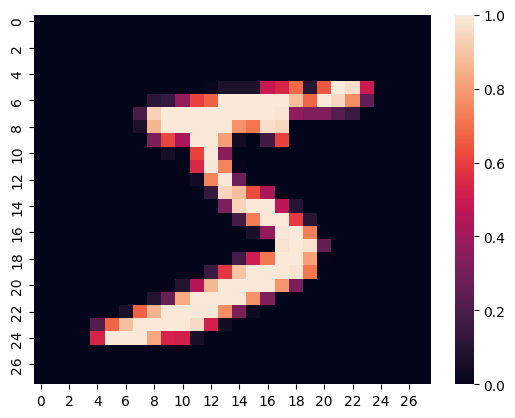

In [6]:
sns.heatmap(x_train[0])
plt.show()

In [10]:
model = Sequential([
 Flatten(input_shape= (28,28)),Dense(128,activation="relu"),
 Dropout(0.2),
 Dense(10)
])

In [11]:
predictions = model(x_train[ :1]).numpy()

In [12]:
predictions

array([[ 0.1613284 ,  0.35044143, -0.37331372,  0.10038574,  0.11100698,
         0.16278192,  0.22050545,  0.6899634 , -0.3106531 ,  0.8536859 ]],
      dtype=float32)

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.0903581 , 0.10916863, 0.0529389 , 0.08501588, 0.08592366,
        0.09048953, 0.09586661, 0.1533029 , 0.05636222, 0.18057355]],
      dtype=float32)

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
model.compile(optimizer="adam" , loss=loss_fn, metrics=["accuracy"])

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2985 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1460 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0884 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9757


In [18]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0728 - accuracy: 0.9781 - 772ms/epoch - 2ms/step


[0.07279113680124283, 0.9781000018119812]

In [19]:
## VALIATING MODEL

In [20]:
val=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0649 - val_accuracy: 0.9819
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0642 - val_accuracy: 0.9817
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0647 - val_accuracy: 0.9817
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0617 - val_accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0654 - val_accuracy: 0.9817


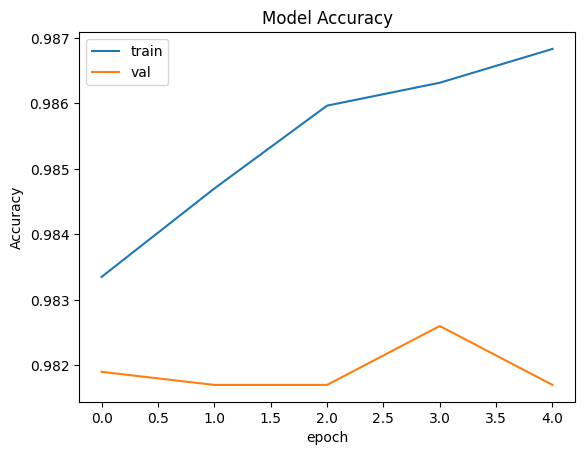

In [21]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()